# Titanic Survival Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [2]:
df = pd.read_csv("csv/Titanic-Dataset.csv")

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [6]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns= ["Cabin", "Ticket"], axis =1, inplace=True)

# Feature Engineering 

In [7]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int) 

In [8]:
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=["Child", "Teen", "Adult", "Middle", "Senior"],
                        include_lowest=True)

# Exploratory Analysis

In [9]:
print("Survival by Gender")
df.groupby("Sex")["Survived"].mean()

Survival by Gender


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
print("Survival by Class")
df.groupby("Pclass")["Survived"].mean()

Survival by Class


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
print("Survival by Age Group")
df.groupby("AgeGroup", observed=True)["Survived"].mean()

Survival by Age Group


AgeGroup
Child     0.579710
Teen      0.428571
Adult     0.353271
Middle    0.400000
Senior    0.227273
Name: Survived, dtype: float64

# Visualizations

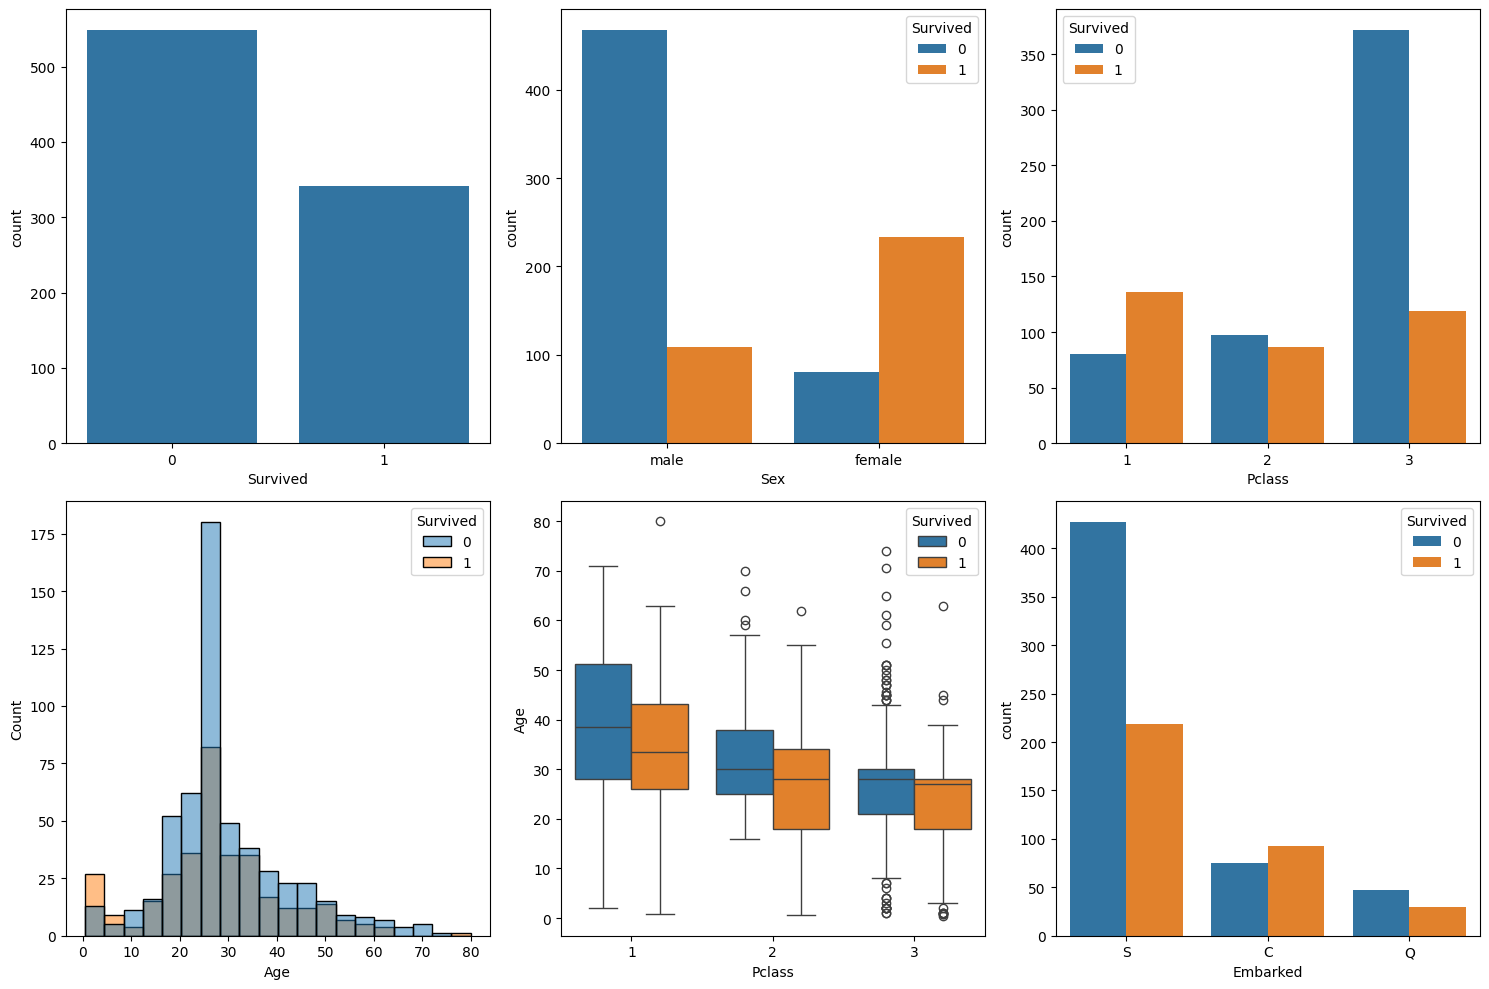

In [12]:
fig, axes = plt.subplots(2, 3,figsize=(15, 10))
sns.countplot(data=df, x="Survived", ax=axes[0,0])
sns.countplot(data=df, x="Sex", hue="Survived", ax=axes[0,1])
sns.countplot(data=df, x="Pclass", hue="Survived", ax=axes[0,2])
sns.histplot(data=df, x='Age', hue='Survived', bins=20, ax=axes[1,0])
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived', ax=axes[1,1])
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1,2])
plt.tight_layout()
plt.show()

# Correlation Matrix

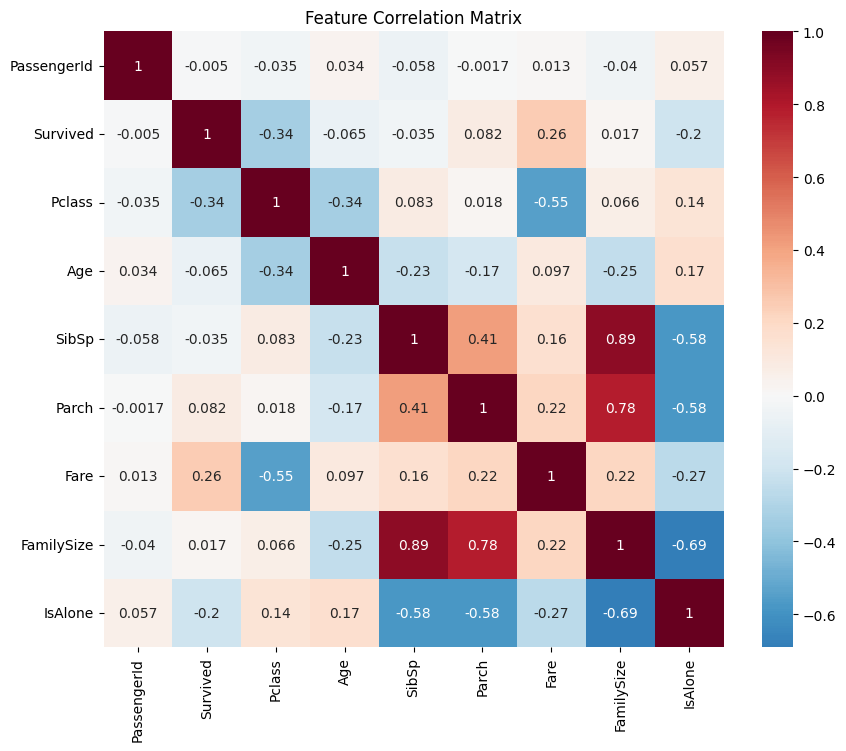

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Business Insights

Female Survival :74.2%
1st Class Survival:63.0%


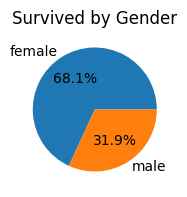

In [15]:
svd_female = df.groupby("Sex")["Survived"].mean()["female"] # Survived_female
first_class = df.groupby("Pclass")["Survived"].mean()[1] # First_class

print(f"Female Survival :{svd_female:.1%}")
print(f"1st Class Survival:{first_class:.1%}")

survived_gender = df[df["Survived"] == 1]["Sex"].value_counts()
plt.figure(figsize=(2, 3))
plt.pie(survived_gender, labels=survived_gender.index, autopct="%.1f%%")
plt.title("Survived by Gender")
plt.show()

# Save Results

In [17]:
df.to_csv("titanic_cleaned.csv", index = False)